Task 1

1. The variables being used in this bubble plot are income on the x-axis and life-expectancy on the y-axis. The fill color aesthetic of each bubble is related to the geographic area and the size aesthetic of each bubble is related to the population of each country. There is also a year watermark on the plot.

In [466]:
# 2
import pandas as pd
import numpy as np
data_1 = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/q1data.csv")
data_1 = data_1.dropna()
data_1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [149]:
data_1["population"] = data_1["population"].astype(float)
data_1["income"] = np.log2(data_1["income"])

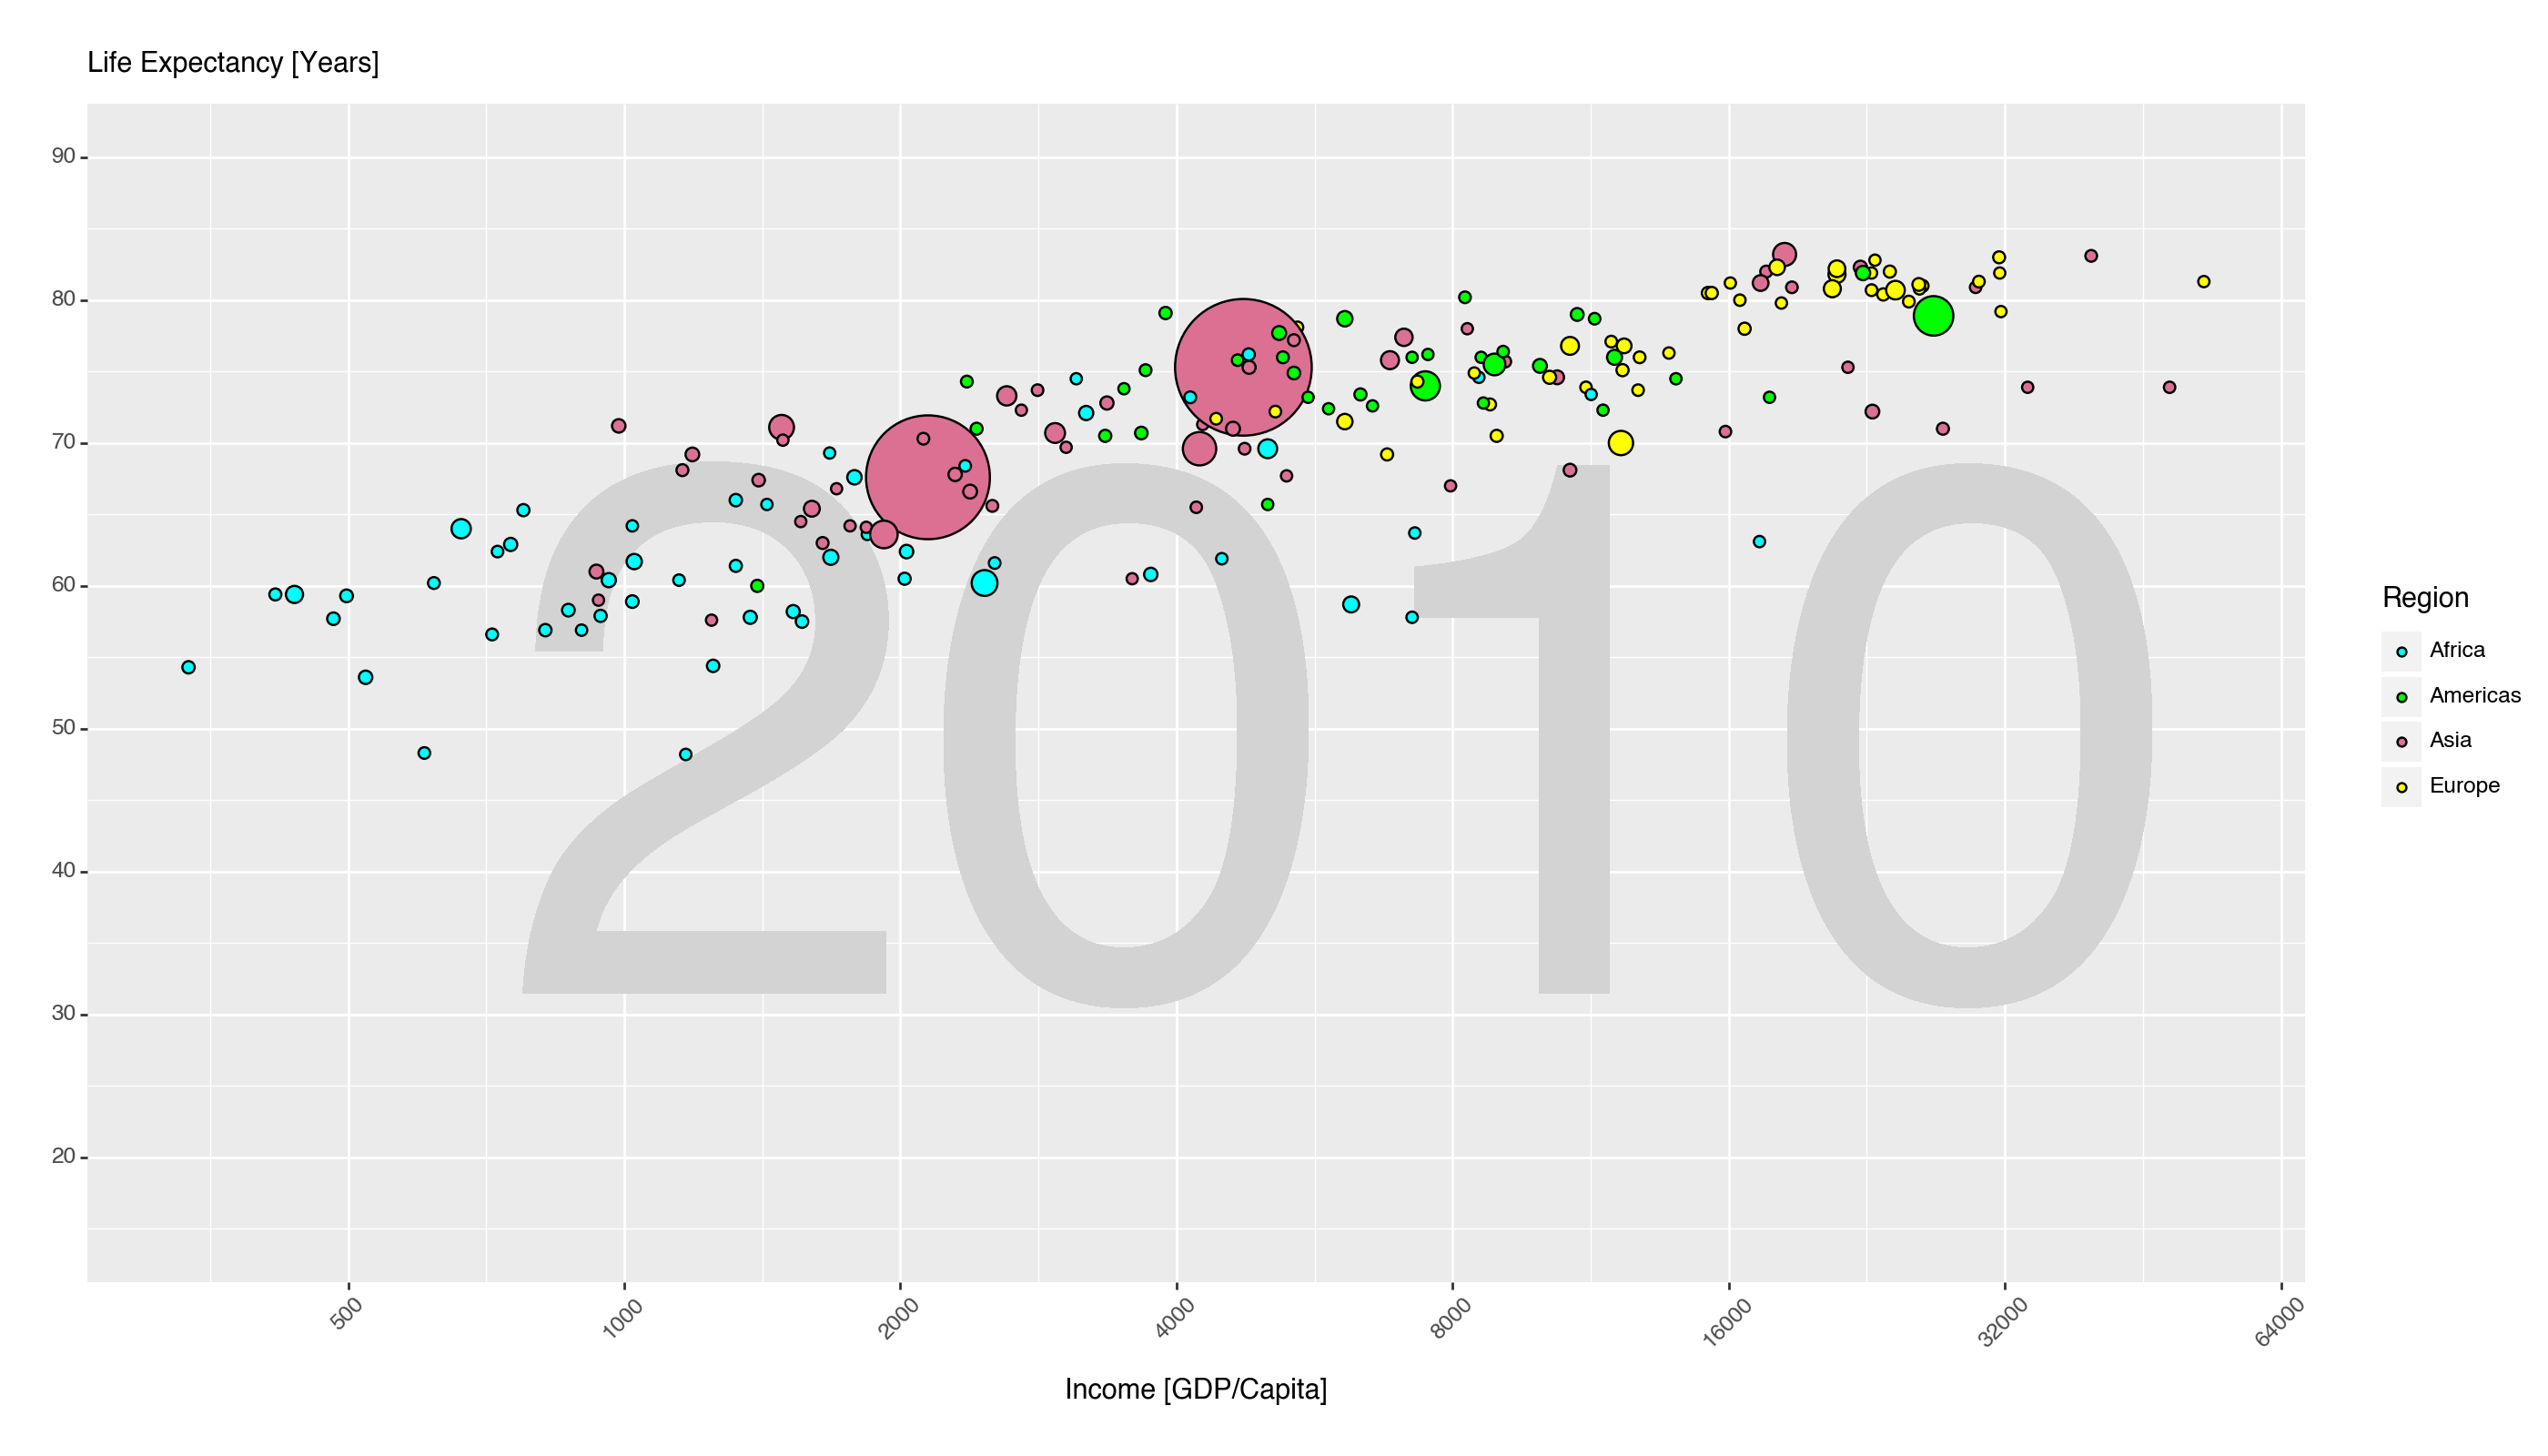

<Figure Size: (1400 x 800)>

In [162]:
# 3
from plotnine import ggplot, aes, geom_point, labs, scale_x_continuous, scale_y_continuous, theme, element_text, scale_size_radius, geom_text, guides, scale_fill_manual
(ggplot(data_1, aes(x = "income", y = "life_exp", fill = "four_regions")) + 
    geom_text(aes(
        label = "2010", inherit_aes = False, x = 13.6, y = 45),
        color = "lightgray", alpha = .002, size = 300, show_legend = False
             ) +
    geom_point(aes(size = "population", na_rm = True)) +
    scale_size_radius(range = (2, 30)) +
    scale_x_continuous(breaks = [9, 10, 11, 12, 13, 14, 15, 16, 17], labels = [0, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) +
    scale_y_continuous(limits = [15, 90], breaks = [20, 30, 40, 50, 60, 70, 80, 90]) +
    labs(
        x = "Income [GDP/Capita]",
        y = "",
        subtitle = "Life Expectancy [Years]",
        fill = "Region"
    ) +
    theme(
        axis_text_x = element_text(angle=45),
        figure_size = (14, 8)
    ) +
    guides(size=False) +
    scale_fill_manual(values = ["Cyan", "Lime", "PaleVioletRed", "Yellow"], labels = ["Africa", "Americas", "Asia", "Europe"])
)

4. Another geometry that could be used is a boxplot. This is a significantly worse visualization of this data, as it still shows the spread of regions and the relative sizes, but there is a lot of lost information. In the boxplot, the data is no longer separated by each country in each region and the size of each country's population is no longer represented.

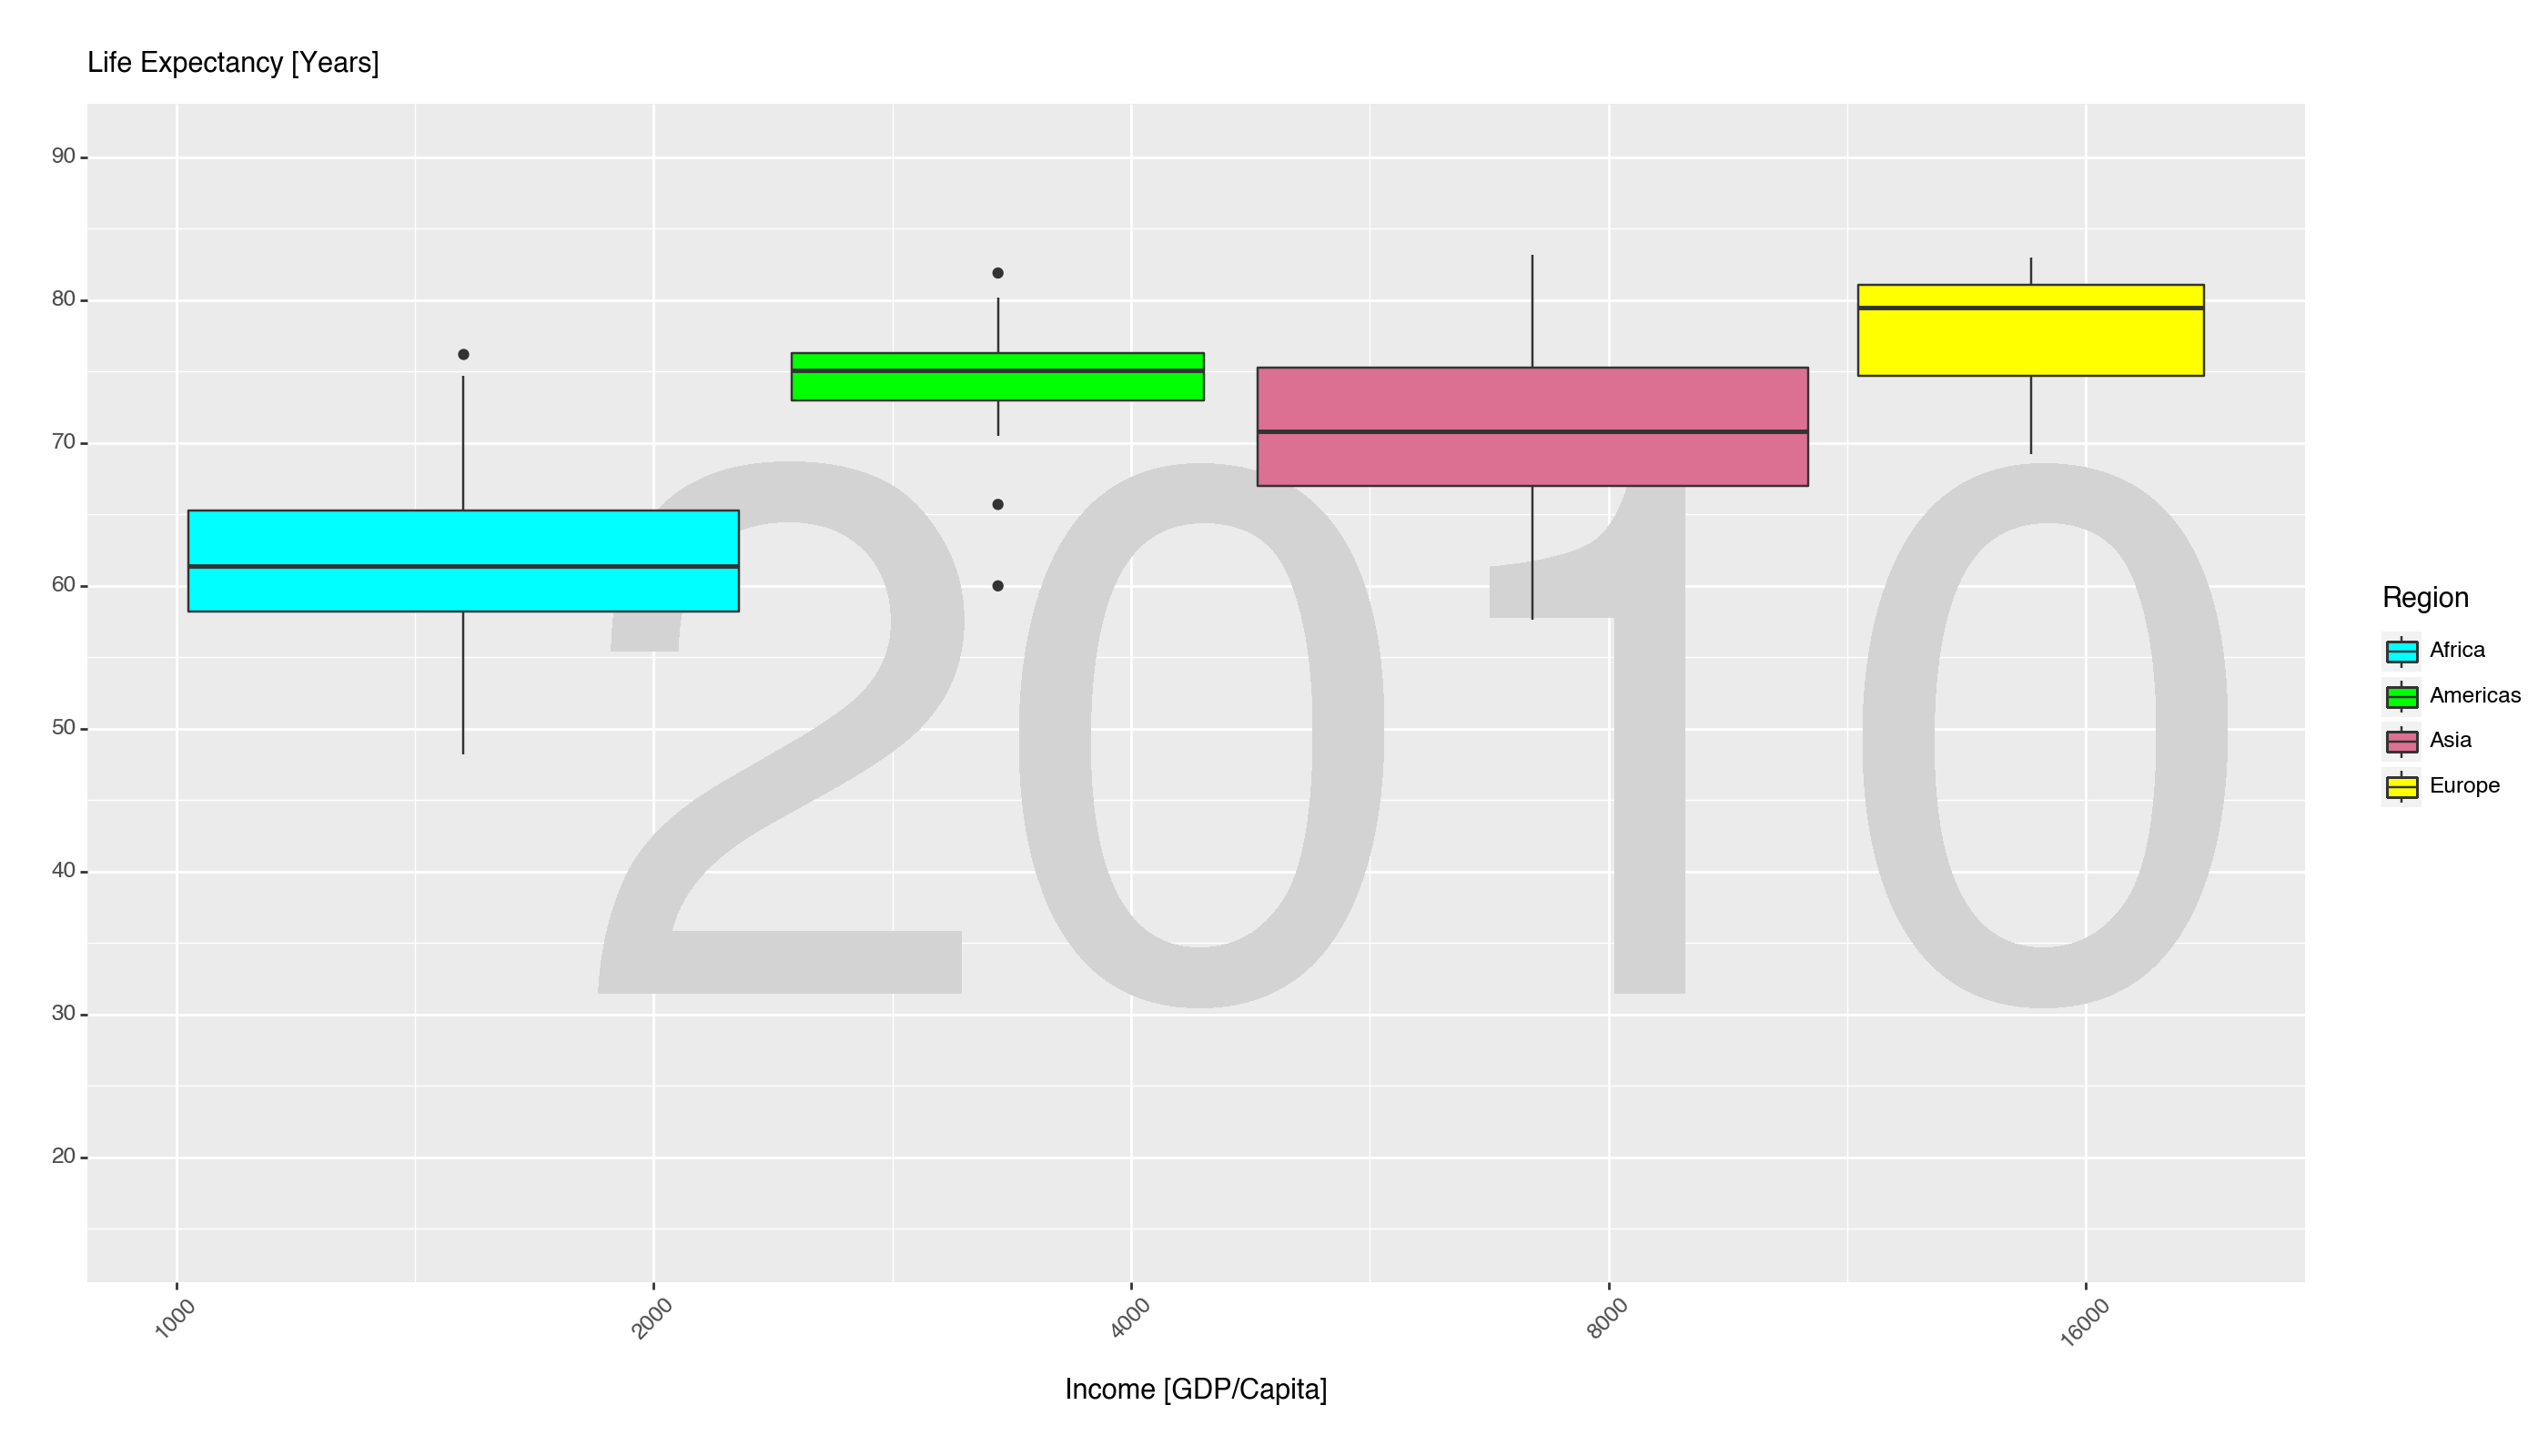

<Figure Size: (1400 x 800)>

In [157]:
from plotnine import geom_boxplot
(ggplot(data_1, aes(x = "income", y = "life_exp", fill = "four_regions")) + 
    geom_text(aes(label = "2010", inherit_aes = False, x = 13.6, y = 45), color = "lightgray", alpha = .002, size = 300, show_legend = False) +
    geom_boxplot(aes(size = "population", na_rm = True)) +
    scale_size_radius(range = (2, 30)) +
    scale_x_continuous(breaks = [9, 10, 11, 12, 13, 14, 15, 16, 17], labels = [0, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) +
    scale_y_continuous(limits = [15, 90], breaks = [20, 30, 40, 50, 60, 70, 80, 90]) +
    labs(
        x = "Income [GDP/Capita]",
        y = "",
        subtitle = "Life Expectancy [Years]",
        fill = "Region"
    ) +
    theme(
        axis_text_x = element_text(angle=45),
        figure_size = (14, 8)
    ) +
    guides(size=False) +
    scale_fill_manual(values = ["Cyan", "Lime", "PaleVioletRed", "Yellow"], labels = ["Africa", "Americas", "Asia", "Europe"])
)

Task 2

1. The aesthetics being used on this bubble plot are exports as percent of GDP on the x-axis, imports as percent of GDP on the y-axis, fill color of the bubbles as region, and energy use as the size of the bubbles. There is also a year watermark on the plot.

In [267]:
#2 
data_2 = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/q2data.csv")
data_2 = data_2.dropna()
data_2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
198,22.9,22.6,2080,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia
200,22.7,20.9,2250,1997,Venezuela,americas,america,america_south,Latin America & Caribbean
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [275]:
for i in data_2["energy"]:
    if "k" in i:
        data_2.loc[data_2["energy"] == i, "energy"] = float(i[:-1]) * 1000

In [276]:
data_2["energy"] = data_2["energy"].astype(float)
data_2["imports"] = data_2["imports"].astype(float)
data_2["exports"] = data_2["exports"].astype(float)
data_2["four_regions"] = data_2["four_regions"].astype(str)
data_2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660.0,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610.0,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550.0,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
198,22.9,22.6,2080.0,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia
200,22.7,20.9,2250.0,1997,Venezuela,americas,america,america_south,Latin America & Caribbean
201,52.2,44.8,340.0,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
204,31.6,24.6,617.0,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


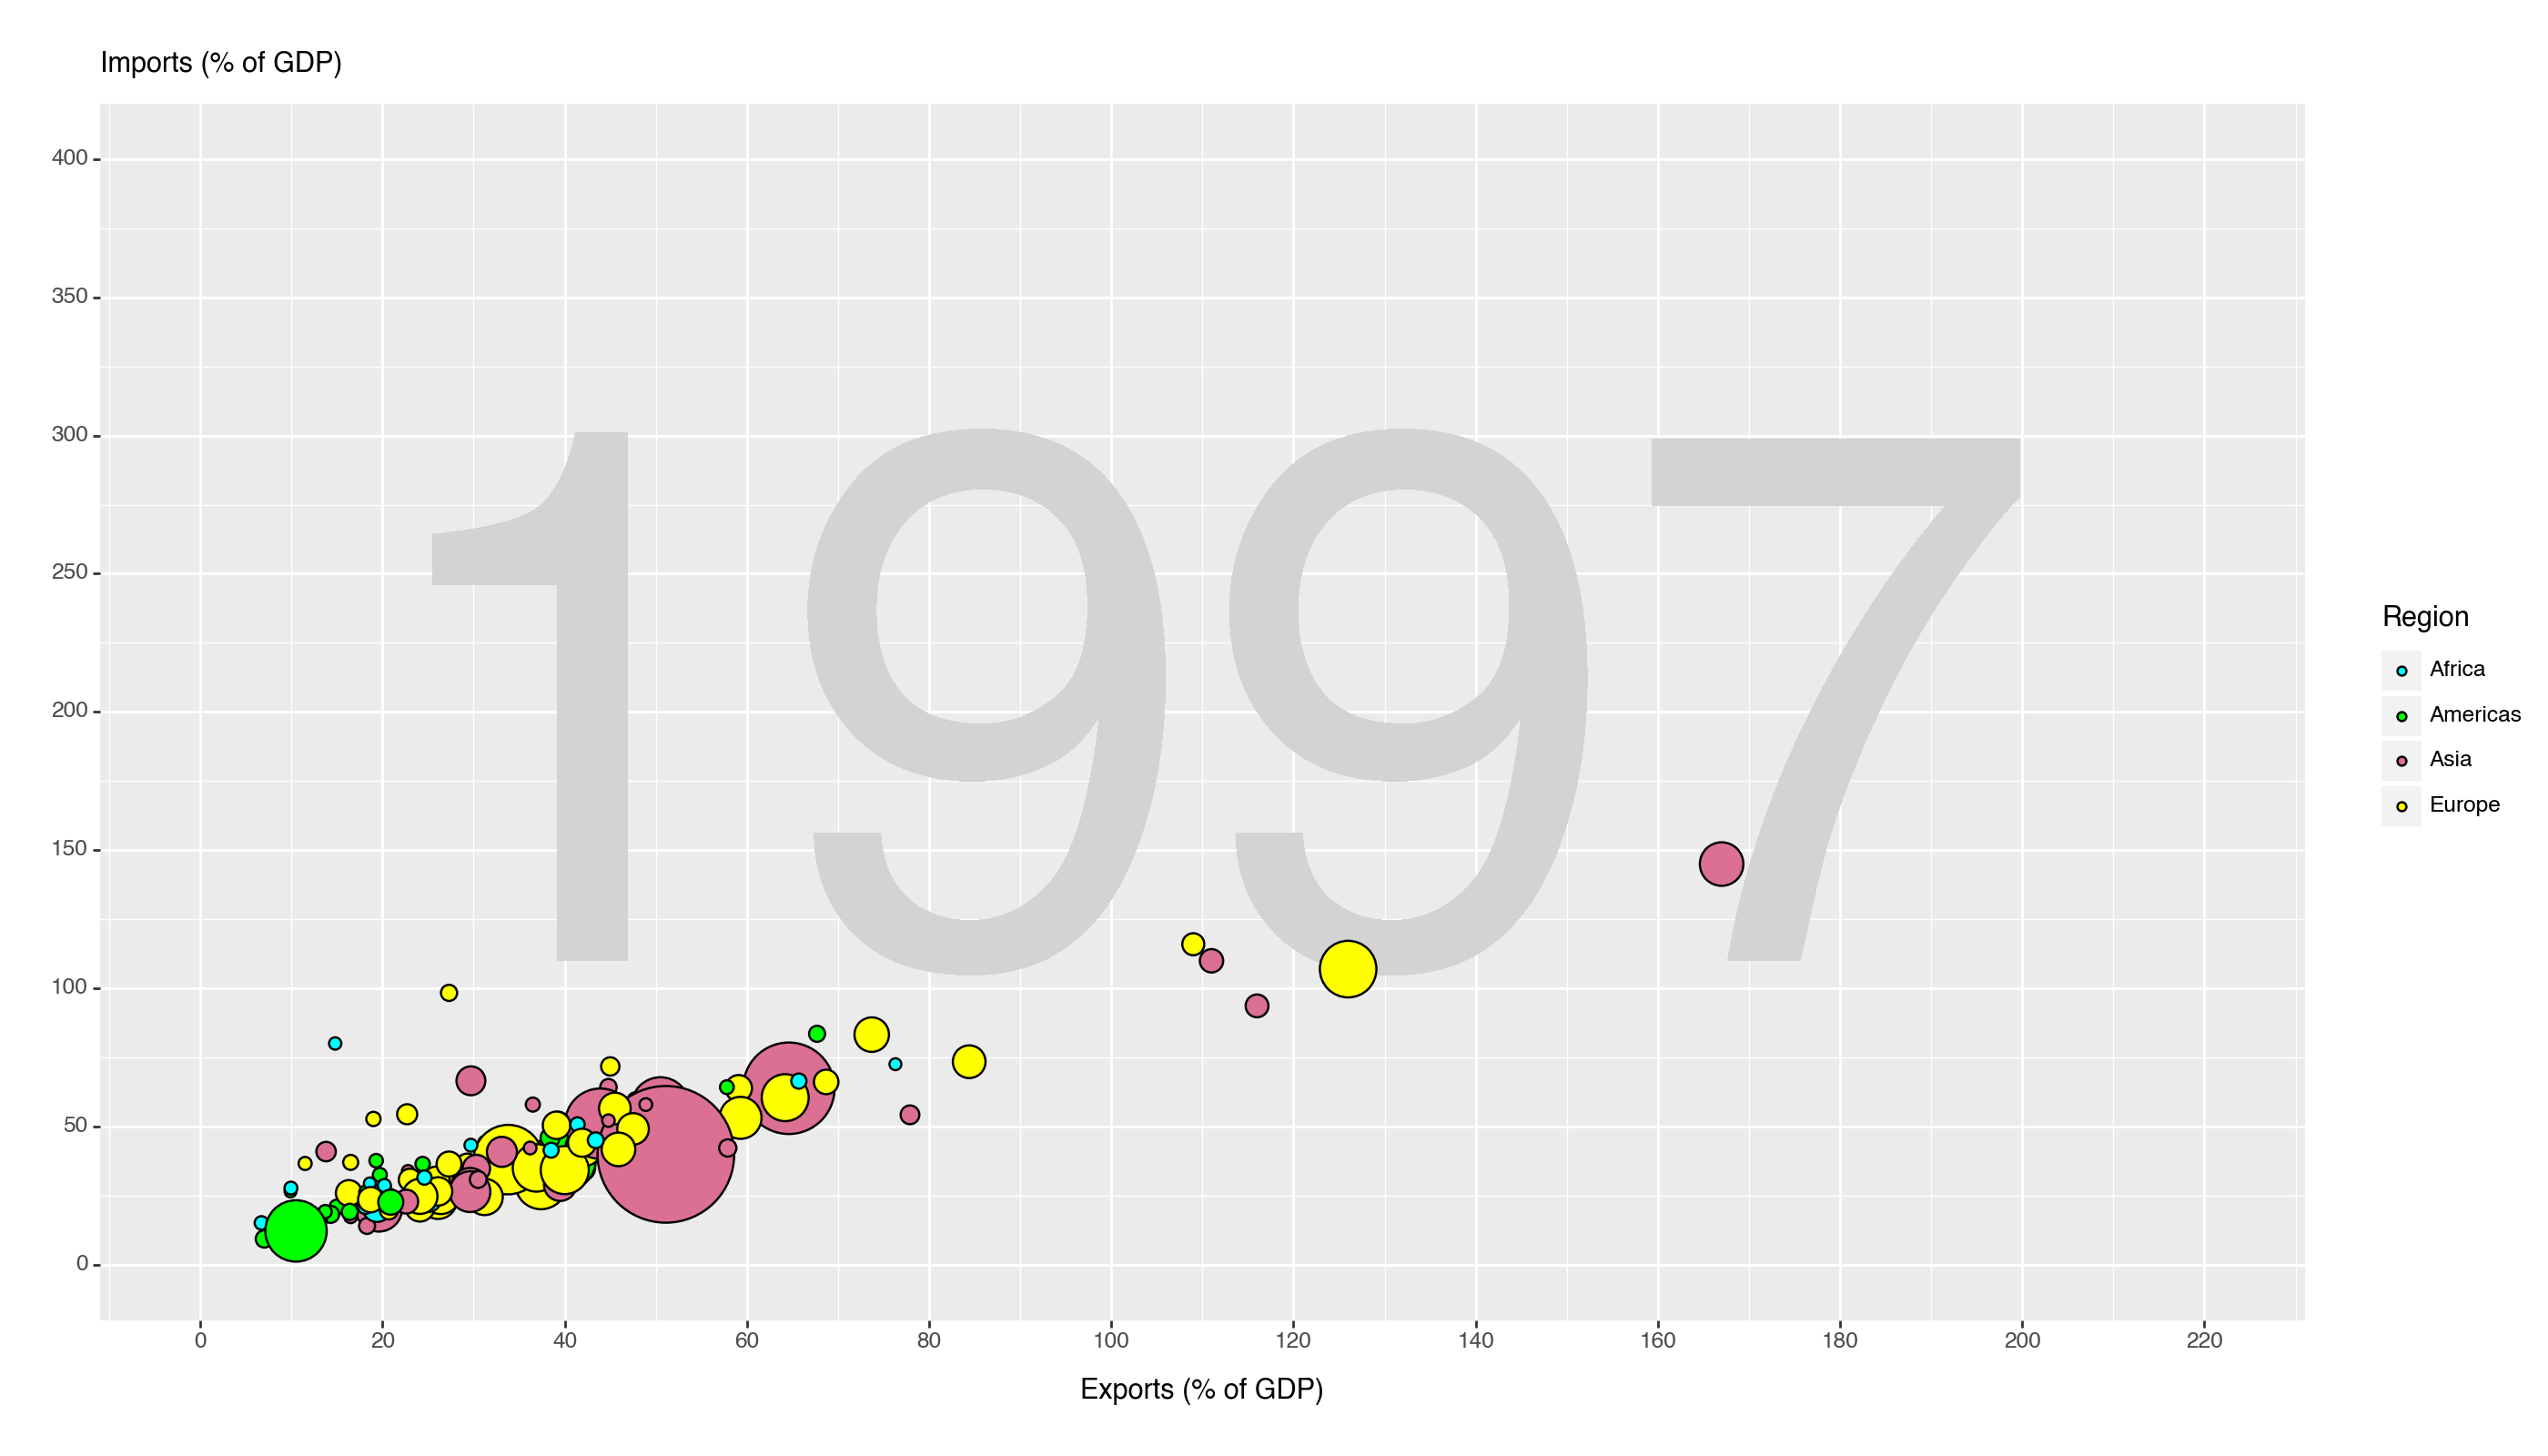

<Figure Size: (1400 x 800)>

In [300]:
# 3
(ggplot(data_2, aes(x = "exports", y = "imports", fill = "four_regions")) + 
    geom_text(aes(
        label = "1997", inherit_aes = False, x = 110, y = 180),
        color = "lightgray", alpha = .002, size = 300, show_legend = False
             ) +
    geom_point(aes(size = "energy", na_rm = True)) +
    scale_x_continuous(
        limits = [0, 220],
        breaks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220],
        labels = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
    ) +
    scale_y_continuous(
        limits = [0, 400],
        breaks = [0, 50, 100, 150, 200, 250, 300, 350, 400],
        labels = [0, 50, 100, 150, 200, 250, 300, 350, 400]
    ) +
    scale_size_radius(range = (2, 30)) +
    labs(
        x = "Exports (% of GDP)",
        y = "",
        subtitle = "Imports (% of GDP)",
        fill = "Region"
    ) +
    theme(
        axis_text_x = element_text(angle=0),
        figure_size = (14, 8)
    ) +
    guides(size=False) +
    scale_fill_manual(values = ["Cyan", "Lime", "PaleVioletRed", "Yellow"], labels = ["Africa", "Americas", "Asia", "Europe"])
)

4. Another geometry that could be used is a geom_tile. This is a worse visualization because information about the energy usage of the countries is still provided in the visualization but is very difficult to read without zooming in on the plot. Also many of the tiles overlay one another, further increasing difficulty to determine the energy usage.

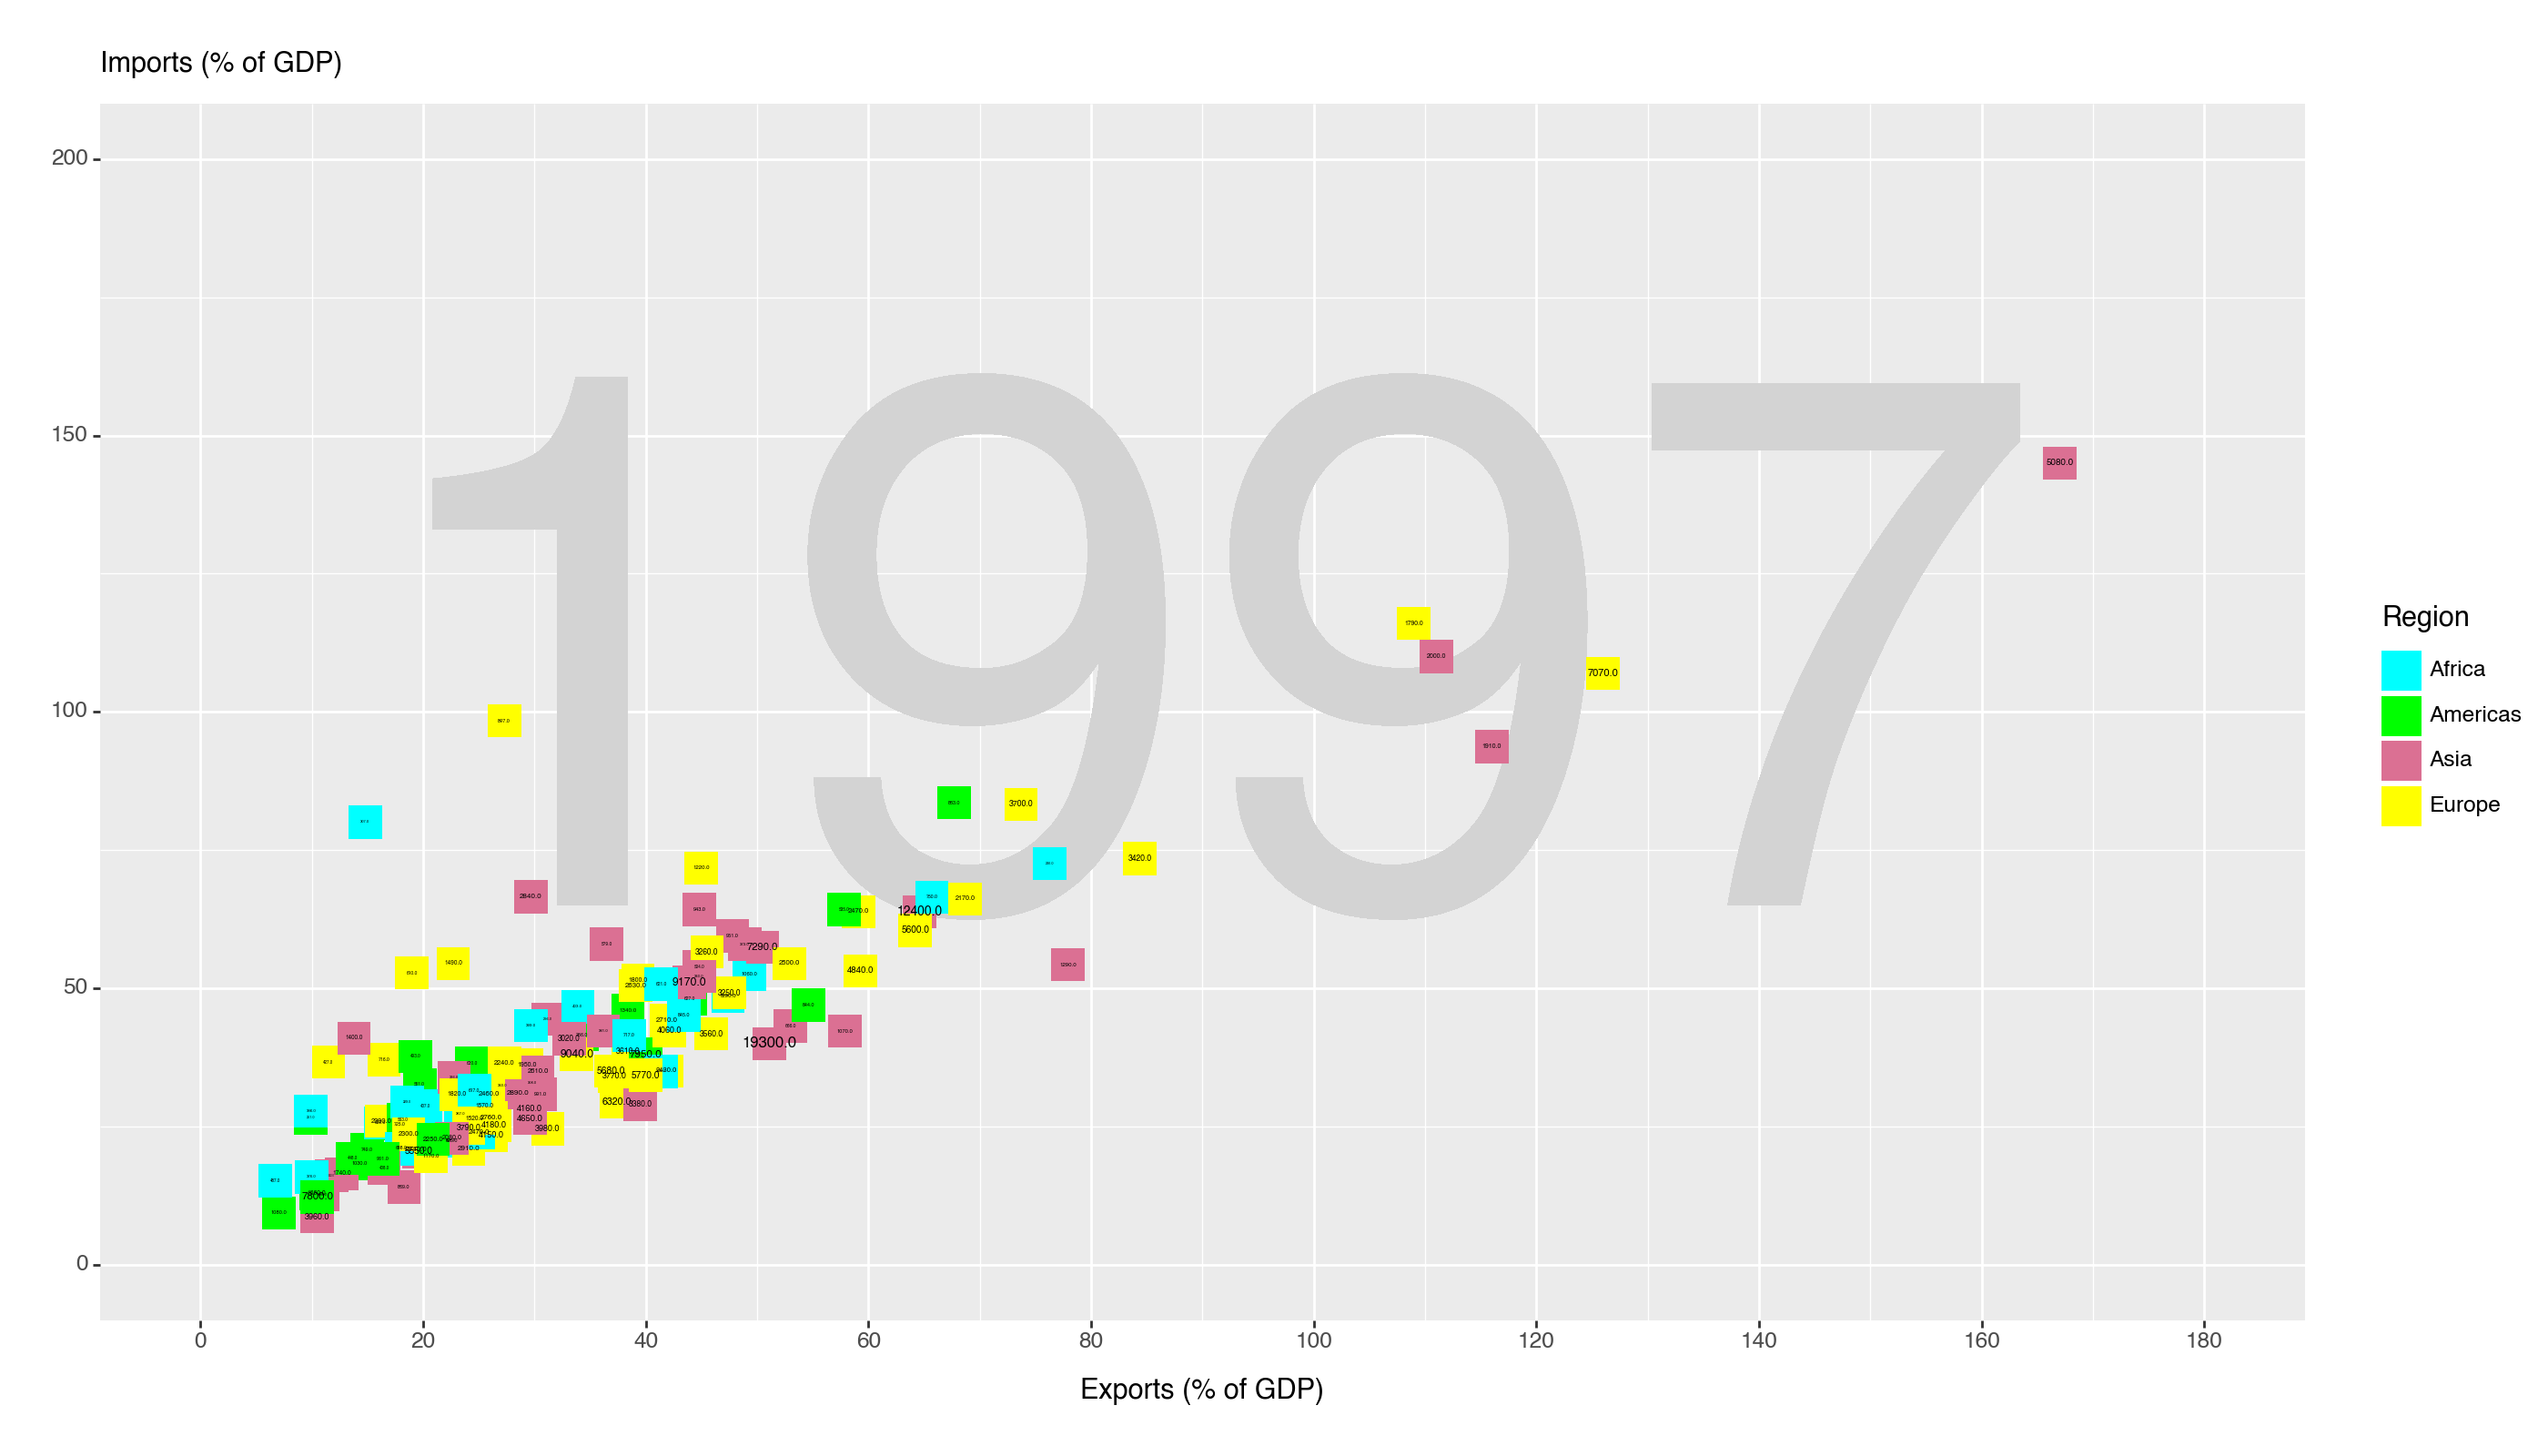

<Figure Size: (1400 x 800)>

In [481]:
from plotnine import geom_tile
(ggplot(data_2, aes(x = "exports", y = "imports", fill = "four_regions", size = "energy")) + 
    geom_text(aes(
        label = "1997", inherit_aes = False, x = 90, y = 100),
        color = "lightgray", alpha = .002, size = 300, show_legend = False
             ) +
    geom_tile(aes(width = 3, height = 6)) +
    geom_text(aes(label = "energy"), show_legend = False) +
    scale_x_continuous(
        limits = [0, 180],
        breaks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180],
        labels = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
    ) +
    scale_y_continuous(
        limits = [0, 200],
        breaks = [0, 50, 100, 150, 200],
        labels = [0, 50, 100, 150, 200]
    ) +
    labs(
        x = "Exports (% of GDP)",
        y = "",
        subtitle = "Imports (% of GDP)",
        fill = "Region"
    ) +
    theme(
        axis_text_x = element_text(angle=0),
        figure_size = (14, 8)
    ) +
    guides(size=False) +
    scale_fill_manual(values = ["Cyan", "Lime", "PaleVioletRed", "Yellow"], labels = ["Africa", "Americas", "Asia", "Europe"])
)

Task 3

1. The aesthetics being used in this bubbleplot are % of the population using the internet on the x-axis, GDP/Capita on the y-axis, region for the fill color, and income for size of the bubbles. There is also a year watermark on the plot.

In [456]:
#2 
data_3 = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/q3data.csv")
data_3 = data_3.dropna()
data_3["gdp"] = np.log2(data_3["gdp"])
data_3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,8.366322,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,11.327553,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,11.880349,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
4,11.30000,15.378566,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
5,0.27000,11.252665,2900.0,2001,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
209,4.91000,13.398744,14800.0,2001,Venezuela,americas,america,america_south,Latin America & Caribbean
210,1.85000,9.726218,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
212,0.51900,10.216746,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,9.952741,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


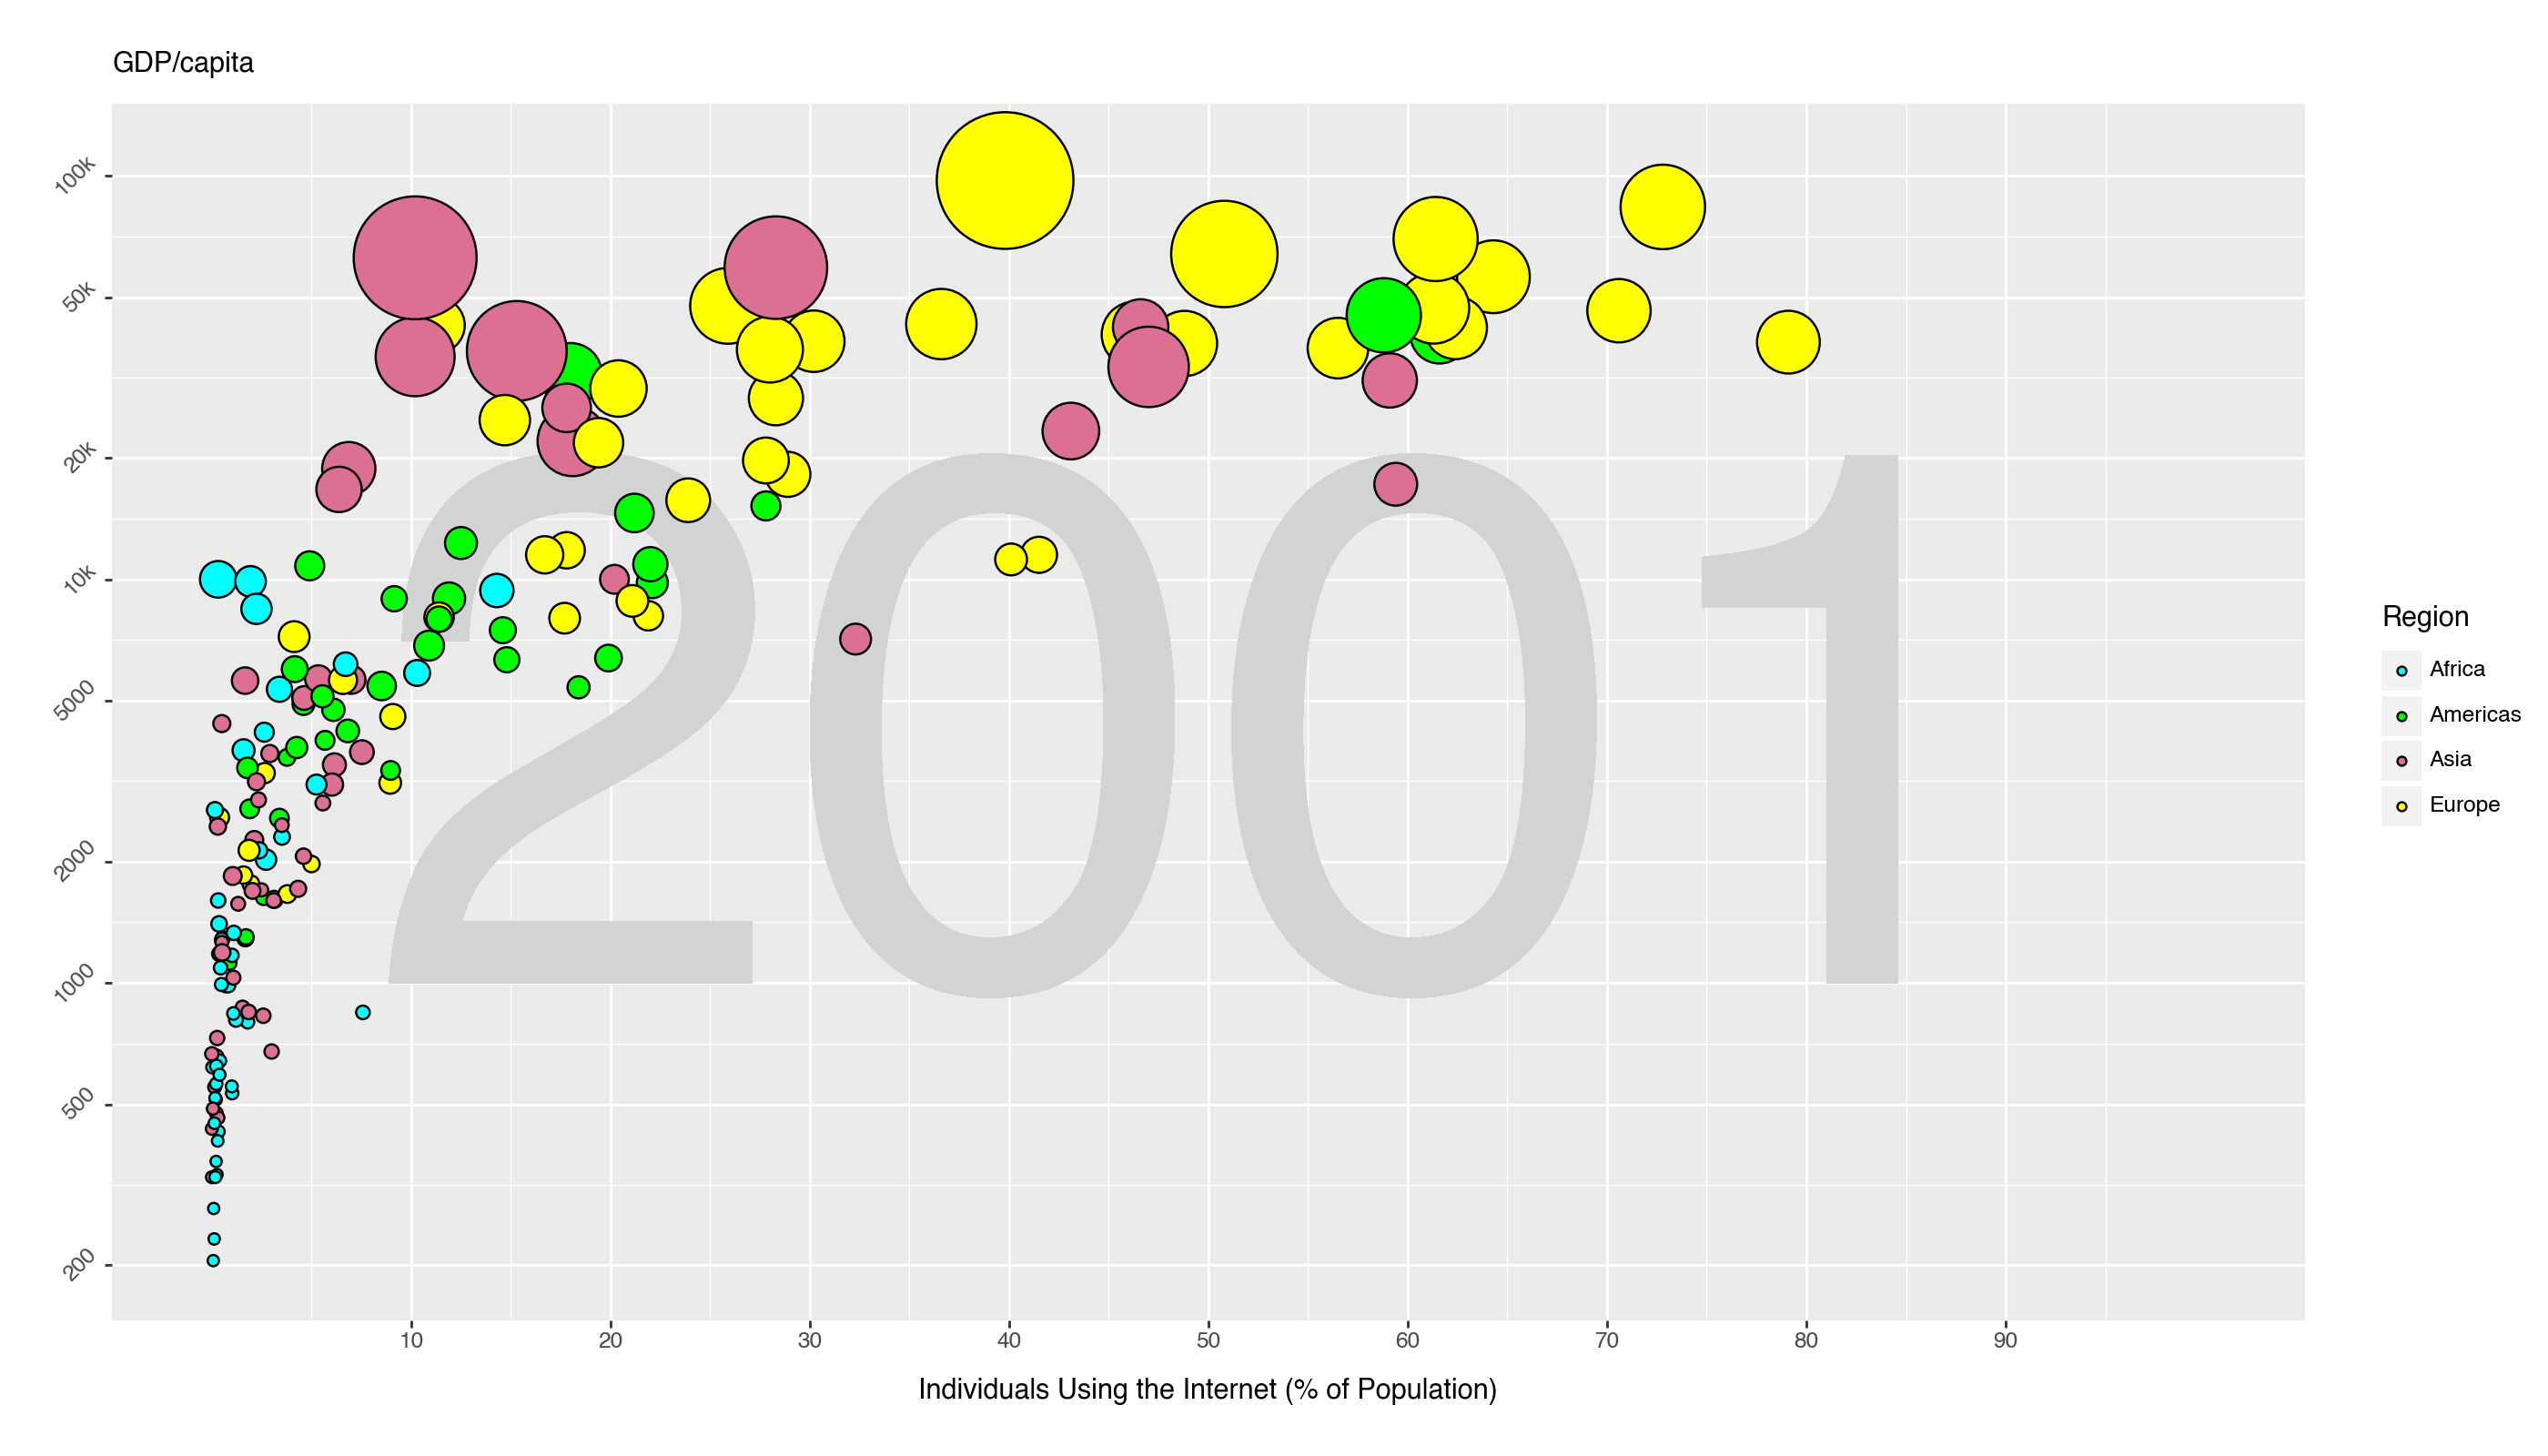

<Figure Size: (1400 x 800)>

In [467]:
#3
(ggplot(data_3, aes(x = "internet_users", y = "gdp", fill = "four_regions", size = "income")) + 
    geom_text(aes(
        label = "2001", inherit_aes = False, x = 50, y = np.log2(3000)),
        color = "lightgray", alpha = .002, size = 300, show_legend = False
             ) +
    geom_point() +
    scale_x_continuous(
        breaks = [10, 20, 30, 40, 50, 60, 70, 80, 90],
        labels = [10, 20, 30, 40, 50, 60, 70, 80, 90],
        limits = [0, 100]
    ) +
    scale_y_continuous(
        breaks = [np.log2(200), np.log2(500), np.log2(1000), np.log2(2000), np.log2(5000), np.log2(10000), np.log2(20000), np.log2(50000), np.log2(100000)],
        labels = [200, 500, 1000, 2000, 5000, "10k", "20k", "50k", "100k"],
        limits = [np.log2(200), np.log2(110000)]
    ) + 
    scale_size_radius(range = (2, 30)) +
    labs(
        x = "Individuals Using the Internet (% of Population)",
        y = "",
        subtitle = "GDP/capita",
        fill = "Region"
    ) +
    theme(
        axis_text_y = element_text(angle=45),
        figure_size = (14, 8)
    ) +
    guides(size=False) +
    scale_fill_manual(values = ["Cyan", "Lime", "PaleVioletRed", "Yellow"], labels = ["Africa", "Americas", "Asia", "Europe"])
)

4. Another geometry that could be used to visualize this data is a barplot. While the country, region, income, internet users, and gdp are all retained, the graph is very cluttered and difficult to read. The legend is very large which makes it difficult to determine which bar relates to each country. This is overall a worse visualization of the data.

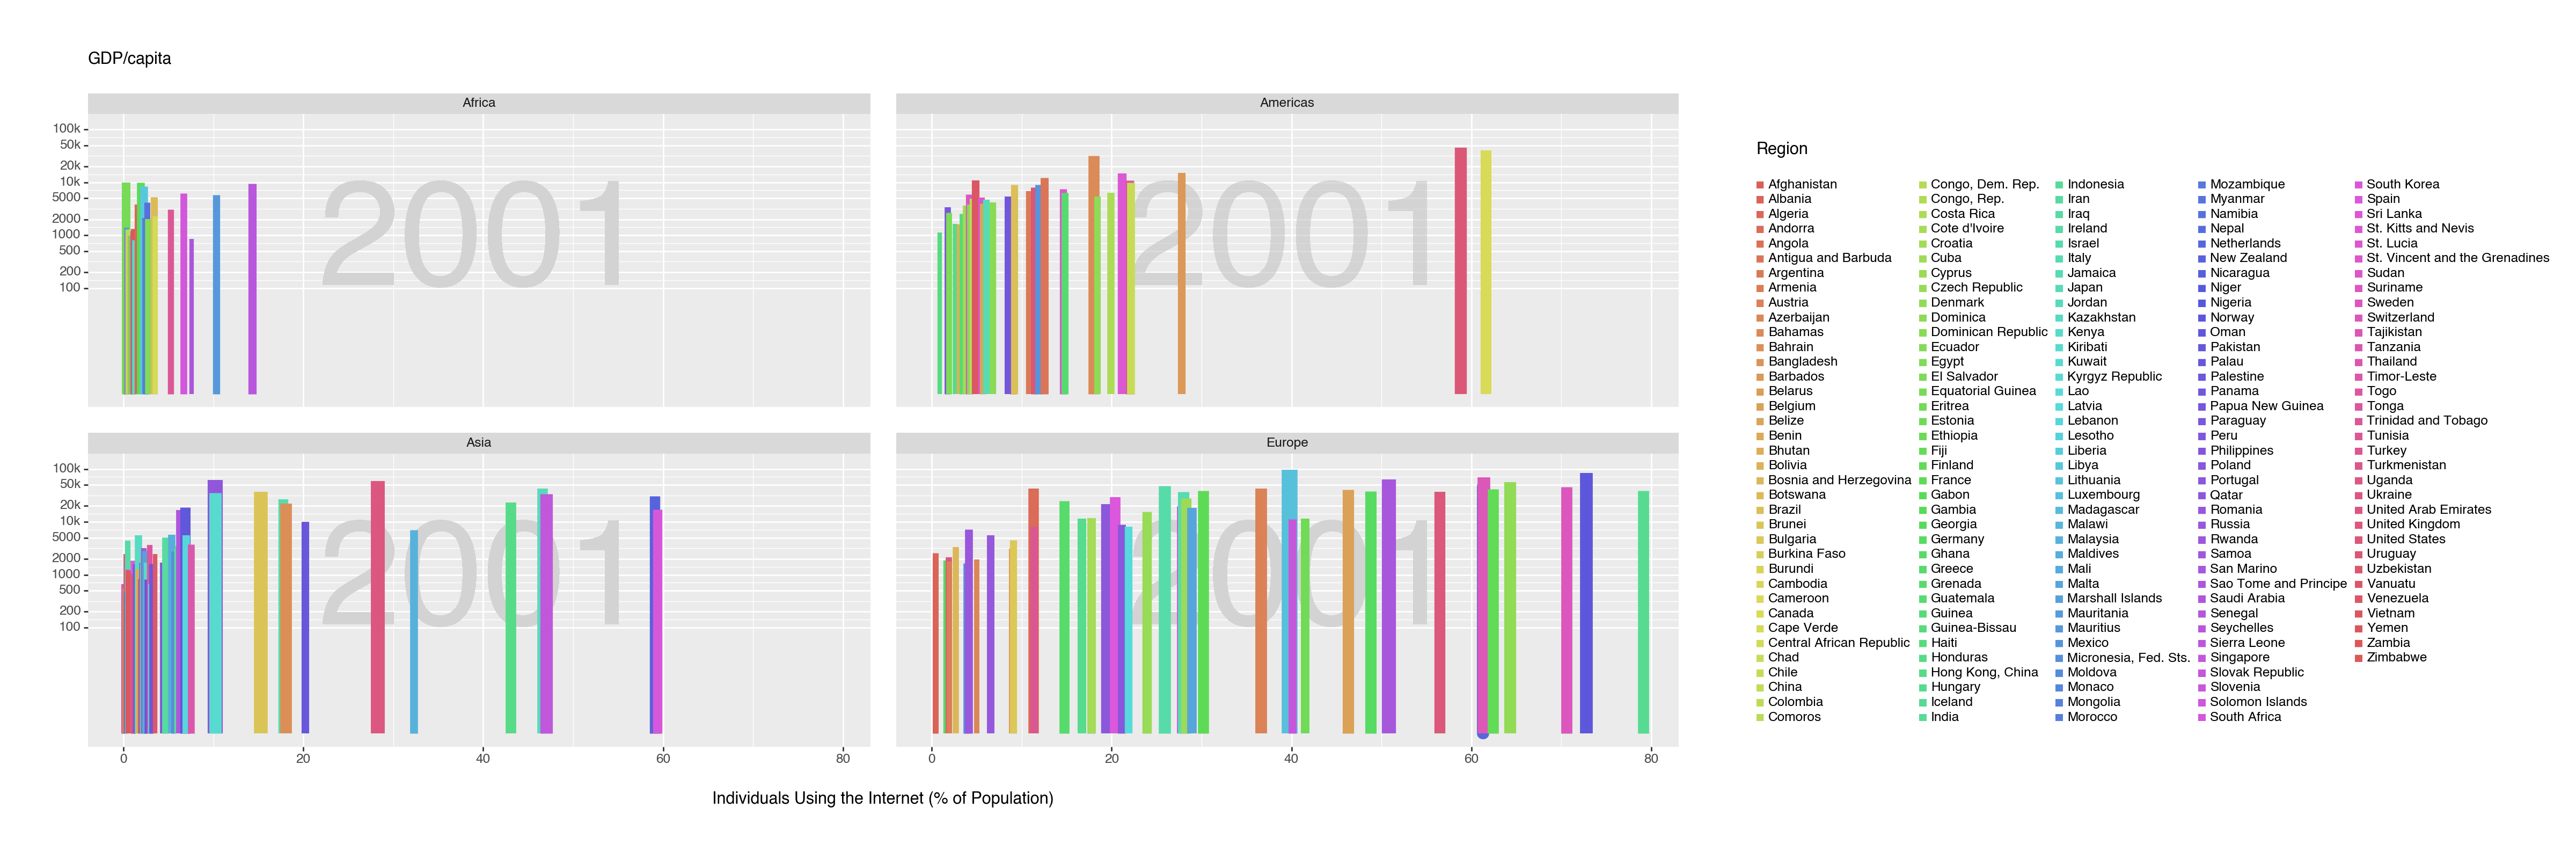

<Figure Size: (2400 x 800)>

In [477]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="plotnine")
from plotnine import geom_bar, facet_wrap, scale_size_area
(ggplot(data_3, aes(x = "internet_users", y = "gdp", fill = "country", size = "income")) + 
    geom_text(aes(
        label = "2001", inherit_aes = False, x = 40, y = np.log2(600)),
        color = "lightgray", alpha = .002, size = 100, show_legend = False
             ) +
    geom_bar(aes(color = "country"), stat = "identity", position = "dodge", show_legend = True) +
    theme(
        axis_text_y = element_text(angle=0),
        figure_size = (24, 8),
        legend_direction = "horizontal",
        legend_key_size = 5
    ) + 
    scale_y_continuous(
        breaks = [np.log2(100), np.log2(200), np.log2(500), np.log2(1000), np.log2(2000), np.log2(5000), np.log2(10000), np.log2(20000), np.log2(50000), np.log2(100000)],
        labels = [100, 200, 500, 1000, 2000, 5000, "10k", "20k", "50k", "100k"],
        limits = [0, np.log2(110000)]
    ) +
    facet_wrap("four_regions", labeller={"africa": "Africa", "americas": "Americas", "asia": "Asia", "europe": "Europe"}) +
    guides(size=False) +
    labs(
        x = "Individuals Using the Internet (% of Population)",
        y = "",
        subtitle = "GDP/capita",
        color = "Region",
        fill = "Region"
    ) 
)